In [1]:
import cv2

In [7]:
from skimage.io import imread,imshow,imsave
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('output2.png',0)

In [8]:
# roberts operator function
def roberts_filter(img,direction):
    m,n = img.shape
    if(direction==0):        
        new_img = np.zeros([m, n])
        for i in range(1,m-1):
            for j in range(1,n-1):
                temp = img[i-1,j-1]*(-1) + img[i,j]*1
                new_img[i,j] = temp
        return new_img
    elif(direction==1):
            new_img = np.zeros([m, n])
            for i in range(1,m-1):
                for j in range(1,n-1):
                    temp = img[i-1,j-1]*(1) + img[i,j]*(-1)
                    new_img[i,j] = temp
            return new_img

In [ ]:
def roberts_filter(img):
    img = cv2.imread(img,0)
    m,n = img.shape
    new_img = np.zeros([m, n])
    new_img1 = new_img.copy()
    for i in range(1,m-1):
        for j in range(1,n-1):
            temp1 = img[i-1,j-1]*(-1) + img[i,j]*1
            new_img[i,j] = temp1
            temp = img[i-1,j-1]*(1) + img[i,j]*(-1)
            new_img1[i,j] = temp
    return np.abs(new_img1) + np.abs(new_img)
    




In [9]:
x = roberts_filter(img,0) # x directionm 
y = roberts_filter(img,1) # y direction
xy = np.abs(x)+ np.abs(y) # combine x+y direction

In [11]:
imsave("robertxy.jpg",xy)

Lossy conversion from float64 to uint8. Range [0.0, 510.0]. Convert image to uint8 prior to saving to suppress this warning.


<Figure size 640x480 with 0 Axes>

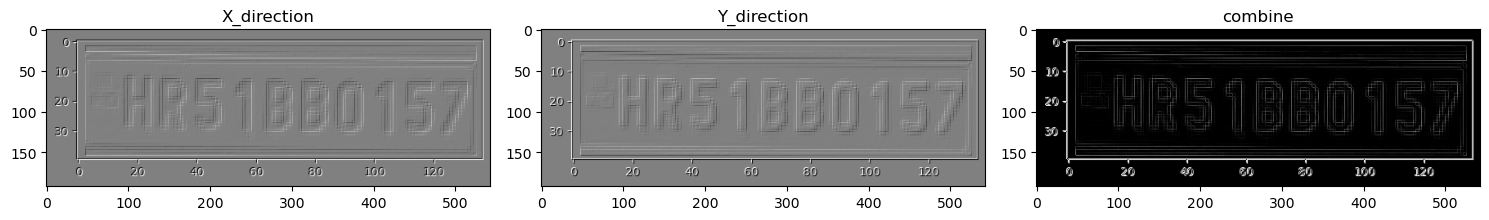

In [10]:
plt.figure()
plt.subplots(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(x,cmap=plt.get_cmap('gray'))
plt.title("X_direction")

plt.subplot(1,3,2)
plt.imshow(y,cmap=plt.get_cmap('gray'))
plt.title("Y_direction")

plt.subplot(1,3,3)
plt.imshow(xy,cmap=plt.get_cmap('gray'))
plt.title("combine")

plt.tight_layout()
plt.show()

In [12]:
from PIL import Image, ImageEnhance

#read the image
im = Image.open("robertxy.jpg")

#image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

factor = 1 #gives original image
im_output1 = enhancer.enhance(factor)
# im_output.save('original-image.png')

factor = 0.5 #decrease constrast
im_output2 = enhancer.enhance(factor)
# im_output.save('less-contrast-image.png')

factor = 1.5 #increase contrast
im_output3 = enhancer.enhance(factor)
# im_output.save('more-contrast-image.png')

In [22]:
imsave("okay.jpg",im_output3.astype('uint8'))

AttributeError: astype

In [14]:
def median_filter(img , k):
    m, n = img.shape
    if(k == 3):

        mask = np.ones([3, 3], dtype = int)
        mask = mask / 9
        # making new image for mean filer output
        # zero padding output image
        # padding is used to keep the size of image same as the out put image
        new_img = np.zeros([m, n])
        for i in range(1, m-1):
            for j in range(1, n-1):
                temp = np.median(img[i-1:i+2,j-1:j+2])
                new_img[i, j]= temp

        return new_img

    if(k==5):
        
        # making new image for mean filer output
        # zero padding output image
        # padding is used to keep the size of image same as the out put image
        new_img = np.zeros([m, n])
        for i in range(2, m-2):
            for j in range(2, n-2):
                temp = np.median(img[i-2:i+3,j-2:j+3])
                new_img[i, j]= temp

        return new_img

In [20]:
smoo = median_filter(im_output3.,3)
plt.imshow(smoo,cmap=plt.get_cmap('gray'))


AttributeError: shape

<Figure size 640x480 with 0 Axes>

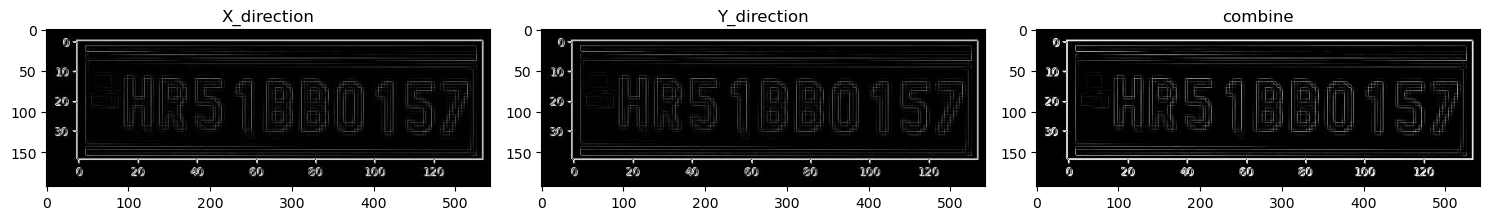

In [13]:
plt.figure()
plt.subplots(figsize=(15, 5))
plt.subplot(1,3,1)
plt.imshow(im_output1,cmap=plt.get_cmap('gray'))
plt.title("X_direction")

plt.subplot(1,3,2)
plt.imshow(im_output2,cmap=plt.get_cmap('gray'))
plt.title("Y_direction")

plt.subplot(1,3,3)
plt.imshow(im_output3,cmap=plt.get_cmap('gray'))
plt.title("combine")

plt.tight_layout()
plt.show()